In [74]:
library(MASS)
library(ISLR)
library(dplyr)
library(ggplot2)
library(car)
library(caret)
library(lattice)

In [75]:
names(lda.pred)

[1] "class"     "posterior" "x"

In [76]:
lda1 = lda(data = Default, default~balance)
lda1

Call:
lda(default ~ balance, data = Default)

Prior probabilities of groups:
    No    Yes 
0.9667 0.0333 

Group means:
      balance
No   803.9438
Yes 1747.8217

Coefficients of linear discriminants:
                LD1
balance 0.002206916

In [77]:
pred <- predict(lda1)

In [78]:
Default$probability <- pred$posterior[,2]

In [79]:
#Default$student <- ifelse(Default$probability >= 0.5, "Yes", "No")

In [84]:
Default$class <- pred$class

In [85]:
Default$default.into.value = ifelse(Default$default == "No", 0, 1)

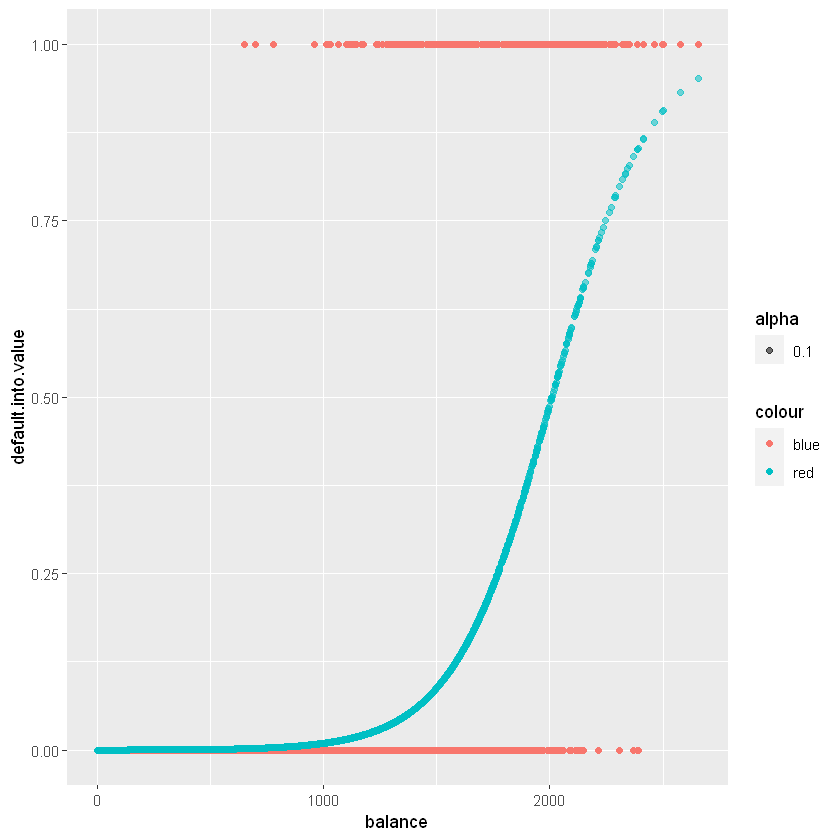

In [86]:
ggplot(data= Default) + geom_point(aes(balance, default.into.value , col = 'blue')) +
geom_point(aes(x=balance, y=probability, col = 'red', alpha = 0.1))

In [87]:
confusionMatrix(table(Default$class, Default$default))

Confusion Matrix and Statistics

     
        No  Yes
  No  9643  257
  Yes   24   76
                                          
               Accuracy : 0.9719          
                 95% CI : (0.9685, 0.9751)
    No Information Rate : 0.9667          
    P-Value [Acc > NIR] : 0.001652        
                                          
                  Kappa : 0.3409          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9975          
            Specificity : 0.2282          
         Pos Pred Value : 0.9740          
         Neg Pred Value : 0.7600          
             Prevalence : 0.9667          
         Detection Rate : 0.9643          
   Detection Prevalence : 0.9900          
      Balanced Accuracy : 0.6129          
                                          
       'Positive' Class : No              
                                          